<a href="https://colab.research.google.com/github/nshantha/Pytorch_notebooks/blob/master/pytorch_FNN%2CCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms,datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train = datasets.MNIST("",train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
test = datasets.MNIST("",train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train,batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10, shuffle=True)

In [6]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

##FNN

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x,dim=1)


In [9]:
net = Net()

In [10]:
import torch.optim as optim

In [11]:
optimizer = optim.Adam(net.parameters(),lr = 0.01)

EPOCHS = 3

for epoch in range(EPOCHS):

  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1,784))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.4067, grad_fn=<NllLossBackward>)
tensor(0.9422, grad_fn=<NllLossBackward>)
tensor(0.3155, grad_fn=<NllLossBackward>)


In [12]:
correct,total = 0,0

In [13]:
with torch.no_grad():
  for data in testset:
    X,y = data
    output = net(X.view(-1,784))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total+=1
print("accuracy = ", round(correct/total,3)*100)

accuracy =  94.19999999999999


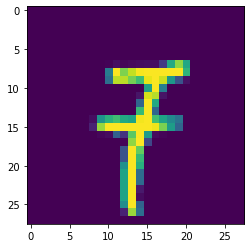

In [14]:
plt.imshow(X[0].view(28,28))

In [15]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(7)
